In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
plt.style.use('Solarize_Light2')

In [2]:
# df = pd.read_csv('wdbc.data',header=None)
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)
df.head()
print(df.shape)

(569, 32)


In [3]:
X = df.iloc[:,2:].values
y = df.iloc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,stratify=y,random_state=1,)
pipe_lr=make_pipeline(StandardScaler(),PCA(n_components=2),LogisticRegression(random_state=1))
pipe_lr.fit(X_train,y_train)
y_pred = pipe_lr.predict(X_test)
print("test accuracy:%.3f" % pipe_lr.score(X_test,y_test))

test accuracy:0.956


In [4]:
k_fold = StratifiedKFold(n_splits=10,random_state=1).split(X_train,y_train)
scores = []
for k, (train,test) in enumerate(k_fold):
    pipe_lr.fit(X_train[train],y_train[train])
    score = pipe_lr.score(X_train[test],y_train[test])
    scores.append(score)
    print('Fold %2d,Class dist.: %s, Acc %.3f'%(k+1,np.bincount(y_train[train]),score))
print('\n CV accuracy %.3f, %.3f'%(np.mean(scores),np.std(scores)))

Fold  1,Class dist.: [256 153], Acc 0.935
Fold  2,Class dist.: [256 153], Acc 0.935
Fold  3,Class dist.: [256 153], Acc 0.957
Fold  4,Class dist.: [256 153], Acc 0.957
Fold  5,Class dist.: [256 153], Acc 0.935
Fold  6,Class dist.: [257 153], Acc 0.956
Fold  7,Class dist.: [257 153], Acc 0.978
Fold  8,Class dist.: [257 153], Acc 0.933
Fold  9,Class dist.: [257 153], Acc 0.956
Fold 10,Class dist.: [257 153], Acc 0.956

 CV accuracy 0.950, 0.014


In [5]:
scores = cross_val_score(estimator=pipe_lr,X= X_train,y = y_train,cv =10,n_jobs=-1)
scores
print('\n CV accuracy %.3f,%.3f'% (np.mean(scores),np.std(scores)))


 CV accuracy 0.950,0.014


In [6]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


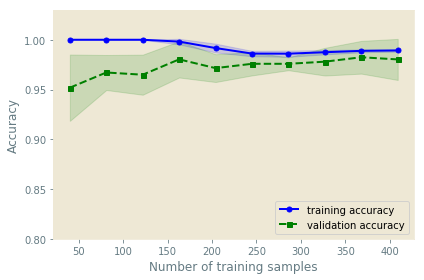

In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
#plt.savefig('images/06_05.png', dpi=300)
plt.show()